In [3]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=5b2a64657da2797c3930bce21582fac20b9838210ae574284cd0b7474a7d4787
  Stored in directory: c:\users\nanas\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import warnings
#sns.set_palette("pastel")
warnings.filterwarnings('ignore')
#plt.style.use('ggplot') # default plot style

In [2]:
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
data = data.drop(["CLIENTNUM",
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
                axis = 1)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exploratory Data Analysis (EDA)

In [4]:
def basic_eda(data, row_limit= 5, list_element_limit = 10):
    print('Info: There are {} columns in the dataset'.format(data.shape[1]))
    print('Info: There are {} rows in the dataset' .format(data.shape[0]))
    print("========================================================")
    
    print("\nData type information of different columns")
    dtypes_data = pd.DataFrame(data.dtypes).reset_index().rename(columns = {0:'dtype', 'index':'column_name'})
    cat_data = dtypes_data[dtypes_data['dtype']=='object']
    num_data = dtypes_data[dtypes_data['dtype']!='object']
    print('Info: There are {} categorical columns'.format(len(dtypes_data)-len(cat_data)))
    
    if list_element_limit >= len(cat_data):
        print("Categorical columns : ", list(cat_data['column_name']))
    else:
        print("Categorical columns : ", list(cat_data['column_name'])[:list_element_limit])
    
    if list_element_limit >= len(num_data):
        print("Numerical columns : ", list(num_data['column_name']))
    else:
        print("Numerical columns : ", list(num_data['column_name'])[:list_element_limit])
        
        display(dtypes_data.head(row_limit))
        
        print("====================================================")
        print("\nDescription of numerical varaibles")
        
        desc_data_num = data[list(num_data['column_name'])].describe().T.reset_index().rename(columns={'index': 'column_name'})
        display(desc_data_num.head(row_limit))
        
        print("====================================================")
        print("\nDescription of categoricla variables")
        
        desc_data_cat = data[list(cat_data['column_name'])].describe().T.reset_index().rename(columns = {'index':'column_name'})
        display(desc_data_cat.head(row_limit))
        
        return

In [5]:
basic_eda(data)

Info: There are 20 columns in the dataset
Info: There are 10127 rows in the dataset

Data type information of different columns
Info: There are 14 categorical columns
Categorical columns :  ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical columns :  ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1']


,column_name,dtype
0,Attrition_Flag,object
1,Customer_Age,int64
2,Gender,object
3,Dependent_count,int64
4,Education_Level,object



Description of numerical varaibles


,column_name,count,mean,std,min,25%,50%,75%,max
0,Customer_Age,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
1,Dependent_count,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
2,Months_on_book,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
3,Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
4,Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0



Description of categoricla variables


,column_name,count,unique,top,freq
0,Attrition_Flag,10127,2,Existing Customer,8500
1,Gender,10127,2,F,5358
2,Education_Level,10127,7,Graduate,3128
3,Marital_Status,10127,4,Married,4687
4,Income_Category,10127,6,Less than $40K,3561


### Checking the data
1) Check for missing values

In [6]:
def missing_values_details(data):
    total = data.isnull().sum()
    
    missing_data = pd.DataFrame({'count_missing': total}).reset_index().rename(columns = {'index':'column_name'})
    
    missing_data['percent_missing'] = missing_data['count_missing']/len(data)
    
    missing_data = missing_data.sort_values(by = 'count_missing', ascending = False)
    
    missing_data = missing_data[missing_data['count_missing']!=0]
    print('Info : {} out of {} columns have missing values'.format(len(missing_data), len(data.columns)))
    
    missing_90 = missing_data[missing_data['percent_missing']>0.9]
    missing_80 = missing_data[missing_data['percent_missing']>0.8]
    missing_70 = missing_data[missing_data['percent_missing']>0.7]
    
    print("Info : {} columns have more that 90% missing values".format(len(missing_90)))
    print("Info : {} columns have more that 80% missing values".format(len(missing_80)))
    print("Info : {} columns have more that 70% missing values".format(len(missing_70)))
    
    return missing_data

In [7]:
missing_values_details(data)

Info : 0 out of 20 columns have missing values
Info : 0 columns have more that 90% missing values
Info : 0 columns have more that 80% missing values
Info : 0 columns have more that 70% missing values


,column_name,count_missing,percent_missing


2) Check for class balance

In [8]:
def check_class_balance(data, target_col):
    counts = data[target_col].value_counts()
    class_data = pd.DataFrame(counts).reset_index().rename(columns= {target_col:'counts', 'index':'class'})
    class_data.plot.bar(x = 'class', y = 'counts')
    print('Info : There are {} classes in the target column'.format(len(class_data)))
    
    max_class = class_data['counts'].max()
    min_class = class_data['counts'].min()
    max_diff = max_class - min_class
    print('Info : Maximum difference between 2 classes is {} observatons that is times w.r.t. minimum class'.format(max_diff,(max_diff/min_class)))
    
    return class_data

Info : There are 2 classes in the target column
Info : Maximum difference between 2 classes is 6873 observatons that is times w.r.t. minimum class


,class,counts
0,Existing Customer,8500
1,Attrited Customer,1627


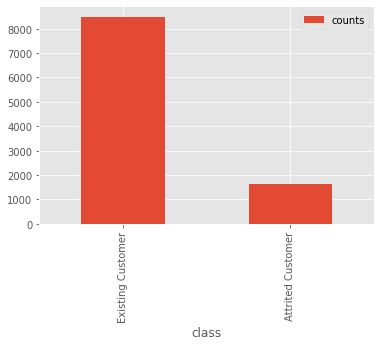

In [28]:
target_col = 'Attrition_Flag'
check_class_balance(data, target_col)

3) Feature Level checks
- Feature level checks for Categorical Columns

In [10]:
# List of categorical columns 
cat_cols = list(data.dtypes[data.dtypes == 'object'].index)
cat_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [11]:
def describe_cat_col(data, col):
    count_un = data[col].nunique() # unique values
    print('Info: There are {} unique values'.format(count_un))
    nulls = data[col].isnull().sum()
    print('Info: There are {} missing valuess that is {} percen'.format(nulls, nulls/len(data)))
    
    ### percent share data
    share_data = pd.DataFrame(data[col].value_counts()).reset_index().rename(columns={'index':'class_name', col: 'counts'})
    share_data['percent_share'] = share_data['counts']/sum(share_data['counts'])
    share_data = share_data.sort_values(by='percent_share', ascending = False)
    
    ## display(share_data)
    
    if(count_un > 3 and count_un < 10):
        fig, ax = plt.subplots()
        fig.suptitle(col + 'Distribution', color = 'blue')
        explode = list((np.array(list(data[col].dropna().value_counts()))/sum(list(data[col].dropna().value_counts())))[::-1])
        labels = list(data[col].dropna().unique())
        sizes = data[col].value_counts()
         
        ax.pie(sizes, explode = explode, startangle = 50, labels = labels, autopct='%1.0f%%', pctdistance = 0.9)
        ax.add_artist(plt.Circle((0,0),0.2,fc='white'))
        plt.show()
        
    else:
            plt.figure()
            plt.title(col + 'Distribution', color = 'green')
            sns.countplot(y = col, data = data)
            plt.show()
            
    return

Column Name: Attrition_Flag
Info: There are 2 unique values
Info: There are 0 missing valuess that is 0.0 percen


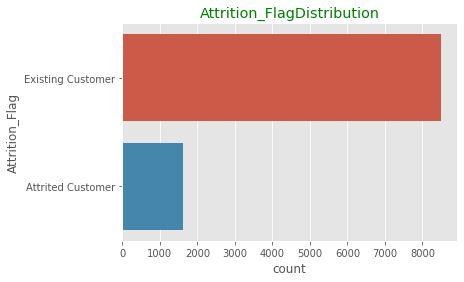

Column Name: Gender
Info: There are 2 unique values
Info: There are 0 missing valuess that is 0.0 percen


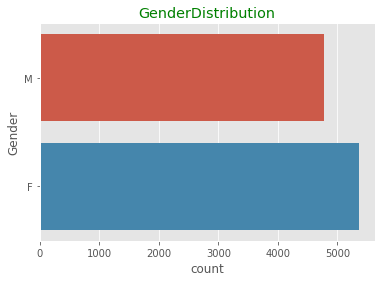

Column Name: Education_Level
Info: There are 7 unique values
Info: There are 0 missing valuess that is 0.0 percen


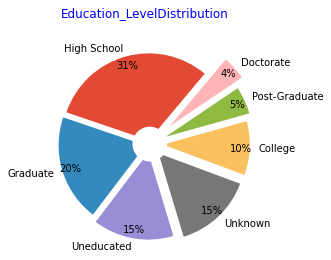

Column Name: Marital_Status
Info: There are 4 unique values
Info: There are 0 missing valuess that is 0.0 percen


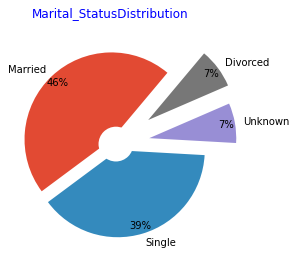

Column Name: Income_Category
Info: There are 6 unique values
Info: There are 0 missing valuess that is 0.0 percen


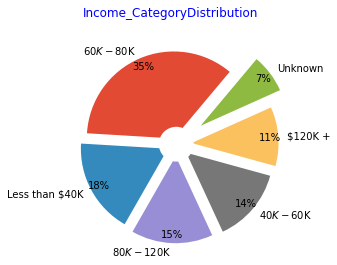

Column Name: Card_Category
Info: There are 4 unique values
Info: There are 0 missing valuess that is 0.0 percen


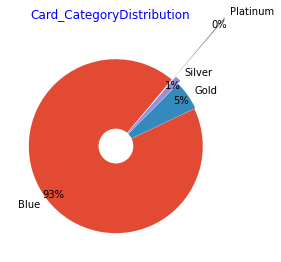

In [26]:
for col in cat_cols:
    print('Column Name: {}'.format(col))
    describe_cat_col(data, col)

2) Feature level check for Numerical column

In [13]:
num_cols = [col for col in data.columns if col not in cat_cols]
num_cols

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [29]:
def describe_num_col(train, col):
    #### This function provides detailed comparison of a numerical varible
    ### missing value
    count_train = train[col].isnull().sum()
    #print("######    Variable Name : {}    ######".format(col))
    
    #### Skewness and Kurtosis
    train_k = stats.kurtosis(train[col].dropna(), bias=False)
    
    train_s = stats.skew(train[col].dropna(), bias=False)
    
    #### Outliers
    
    def count_outliers(data, col):
        mean_d = np.mean(data[col])
        std_d = np.std(data[col])
        
        scaled = (data[col]-mean_d)/std_d
        outliers = abs(scaled) > 3
        if len(outliers.value_counts()) > 1:
            return outliers.value_counts()[1]
        else:
            return 0   
    
    train_o = count_outliers(train, col)
        
    summ_df = pd.DataFrame({'info':['missing_count', 'missing_percent', 'skewness', 'kurtosis', 'outlier_count', 'outlier_percent'],
                           'train_set':[count_train, (count_train/len(train))*100, train_s, train_k, train_o, (train_o/len(train))*100]})
    
    #print("######    Summary Data")
    #display(summ_df)
    
    #print("######    Distribution and Outliers comparision plots")
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    plot10 = sns.distplot(train[train['Attrition_Flag']=="Existing Customer"][col],ax=ax1, label='Existing Customer')
    sns.distplot(train[train['Attrition_Flag']=="Attrited Customer"][col],ax=ax1,color='red', label='Attrited Customer')
    plot10.axes.legend()
    ax1.set_title('Distribution of {name}'.format(name=col))
    
    sns.boxplot(x='Attrition_Flag',y=col,data=train,ax=ax2)
    #plt.xticks(ticks=[0,1],labels=['Non-Diabetes','Diabetes'])
    ax2.set_xlabel('Category') 
    ax2.set_title('Boxplot of {name}'.format(name=col))
    
    
    fig.show()    
    
    return 

In [30]:
for i in num_cols:
    describe_num_col(data, col)

TypeError: unsupported operand type(s) for /: 'str' and 'int'